In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [25]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 200


(200000, 7)


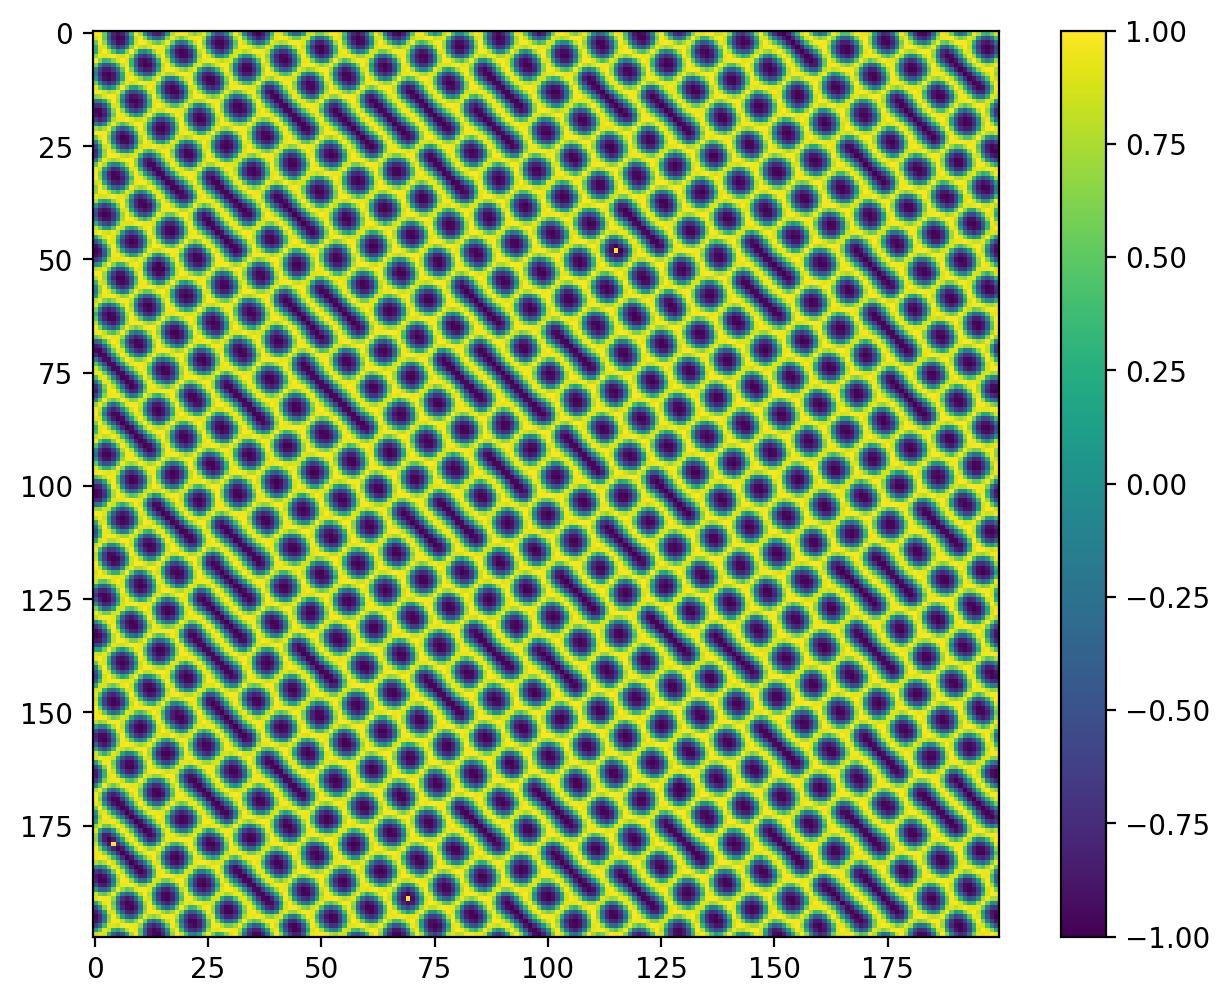

In [26]:
data = np.genfromtxt("SKtest/HeatBath/restart.SK2D_200.out")
print(data.shape)

lattice = np.reshape(data[:,4:], (5, 200, 200, 3))

plt.imshow(lattice[3,:,:,2], vmin=-1, vmax=1)
plt.colorbar()

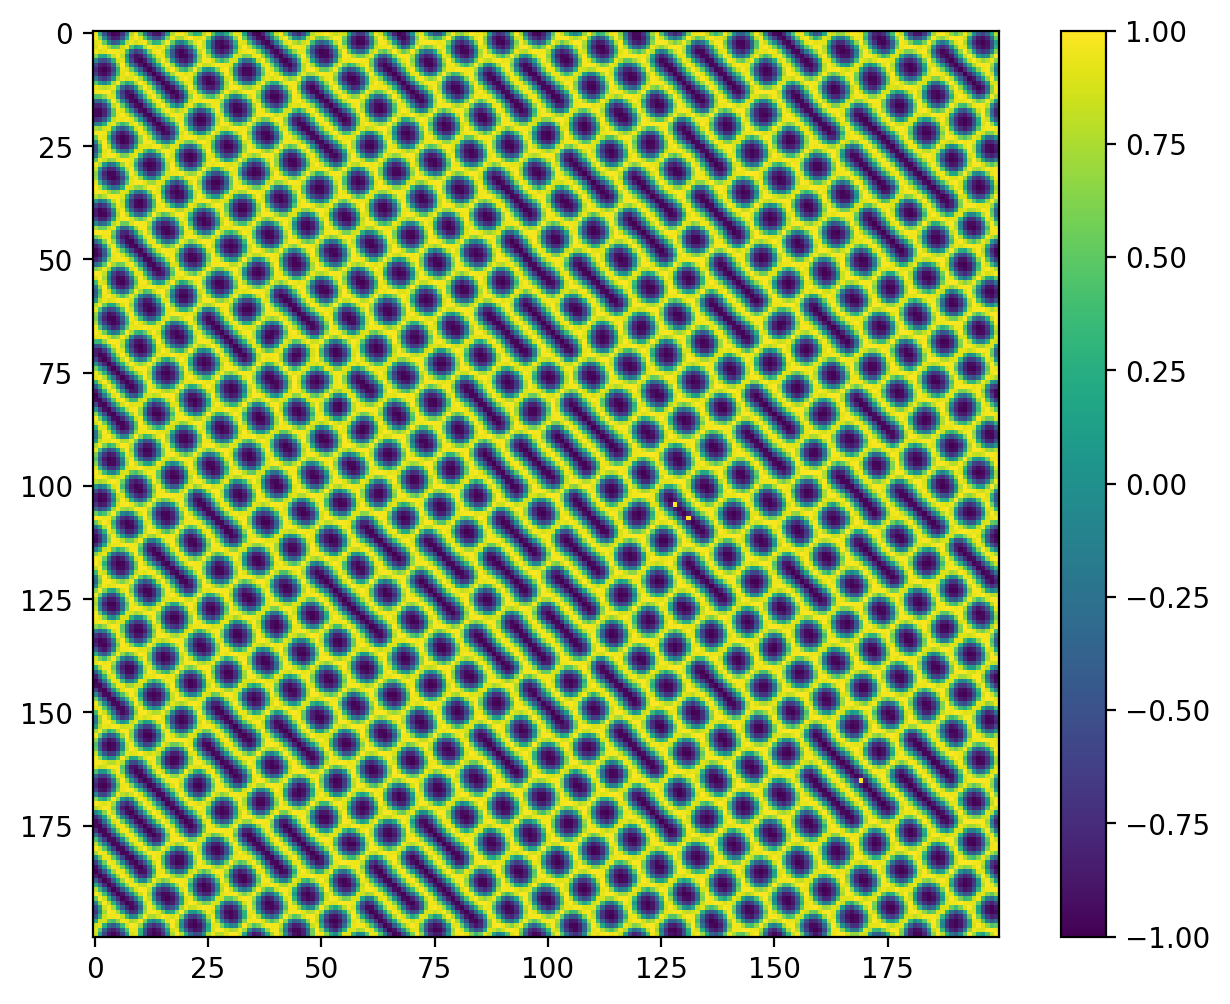

In [47]:
data = np.genfromtxt("SKtest/HeatBath/restart.SK2D_200.out")
lattice = np.reshape(data[:,4:], (5, 200, 200, 3))

plt.imshow(lattice[4,:,:,2], vmin=-1, vmax=1)
plt.colorbar()

In [48]:
def calc_E(lattice):
    E = 0
    w = lattice.shape[0]
    h = lattice.shape[1]
    for x in range(w):
            for y in range(h):
                E -= lattice[x,y].dot(lattice[(x+1)%w,y])
                E -= lattice[x,y].dot(lattice[x,(y+1)%h])
                E -= np.cross(lattice[x,y], lattice[(x+1)%w,y]).dot([0, 1, 0])
                E -= np.cross(lattice[x,y], lattice[x,(y+1)%h]).dot([1, 0, 0])


    return E

In [59]:
calc_E(lattice[4])

-64762.33843313554